In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregar os dados
df = pd.read_csv('dados_streaming.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3.0,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1.0,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1.0,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2.0,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3.0,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [5]:
# Informações gerais dos dados
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     29250 non-null  object 
 1   Gender                  27881 non-null  object 
 2   Time_on_platform        24836 non-null  float64
 3   Devices_connected       23136 non-null  float64
 4   Subscription_type       23108 non-null  object 
 5   Num_streaming_services  4242 non-null   object 
 6   Num_active_profiles     34226 non-null  float64
 7   Avg_rating              26611 non-null  float64
 8   Churned                 26799 non-null  float64
 9   User_id                 34226 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.6+ MB


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3.0,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1.0,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1.0,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2.0,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3.0,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [6]:
# Verificando valores nulos
df.isna().sum()

,0
Age,4978
Gender,6347
Time_on_platform,9392
Devices_connected,11092
Subscription_type,11120
Num_streaming_services,29986
Num_active_profiles,2
Avg_rating,7617
Churned,7429
User_id,2


In [7]:
# Substituir NaN por 0 em colunas específicas
cols_to_fill = ['Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating', 'Churned']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

# Dropar linhas com valores nulos em colunas específicas
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

# Transformar valores de churned (0 e 1) para No e Yes
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

df.isna().sum()

<ipython-input-7-c89bc40249c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [8]:
# Garantir que todos os dados numéricos estejam como inteiros
num_cols = ['Time_on_platform', 'Devices_connected', 'Num_active_profiles', 'Avg_rating']
df[num_cols] = df[num_cols].astype(int)

df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374,3,Premium,1.0,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.81      1.00      0.90      2610
        True       0.00      0.00      0.00       599

    accuracy                           0.81      3209
   macro avg       0.41      0.50      0.45      3209
weighted avg       0.66      0.81      0.73      3209



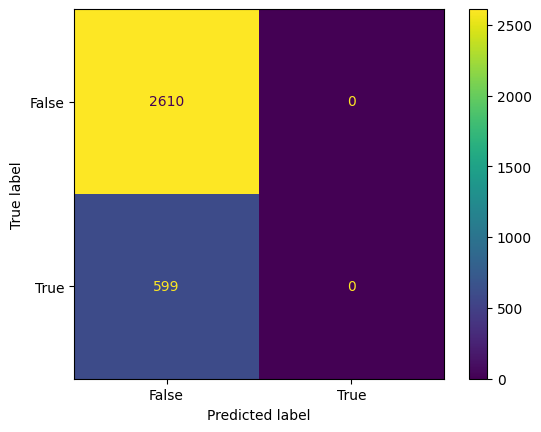

In [10]:
# Codificando variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separando variáveis independentes e alvo
X = df_encoded.drop(['Churned_Yes'], axis=1)
y = df_encoded['Churned_Yes']

# Normalização
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Separação treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinando o modelo
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Avaliação
y_pred_lr = model_lr.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

In [12]:
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

       False       0.83      1.00      0.91      2610
        True       1.00      0.11      0.20       599

    accuracy                           0.83      3209
   macro avg       0.92      0.56      0.55      3209
weighted avg       0.86      0.83      0.78      3209



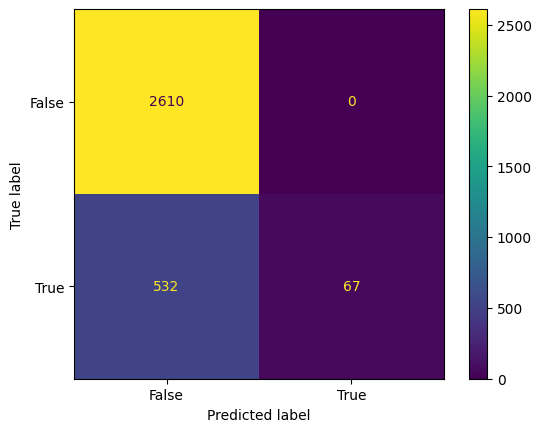

In [13]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_gs = grid_search.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gs)
print(classification_report(y_test, y_pred_gs))

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearch para Random Forest
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Avaliação do modelo
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))